In [1]:
class Value:

    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self.label = label


    def __repr__(self):   # This basically allows us to print nicer looking expressions for the final output
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out

In [ ]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label='e'
d= e + c; d.label='d'
f = Value(-2.0, label='f')
L = d*f; L.label='L'
L

Value(data=-8.0)

In [2]:
from graphviz import Digraph

def trace(root):
    #Builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) #LR == Left to Right

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        #For any value in the graph, create a rectangular ('record') node for it
        dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % ( n.label, n.data, n.grad), shape='record')
        if n._op:
            #If this value is a result of some operation, then create an op node for it
            dot.node(name = uid + n._op, label=n._op)
            #and connect this node to it
            dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
        #Connect n1 to the node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

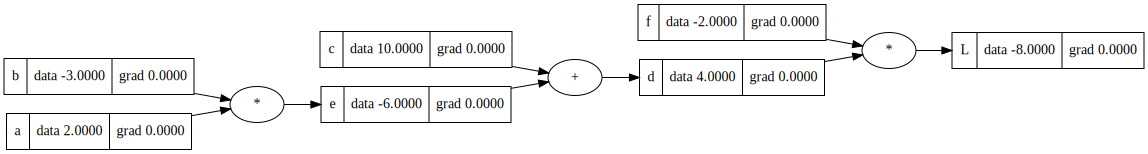

In [ ]:
draw_dot(L)

------------------

### **Implementing the Neuron Mathematical Mode**

![Neuron Model](https://imgs.search.brave.com/eGlTokdhbINxZOKkAUnAz_Cu-grWMt7LkMKJoi66gdQ/rs:fit:500:0:0:0/g:ce/aHR0cHM6Ly9jczIz/MW4uZ2l0aHViLmlv/L2Fzc2V0cy9ubjEv/bmV1cm9uX21vZGVs/LmpwZWc)

In [3]:
#Inputs x1, x2 of the neuron
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

#Weights w1, w2 of the neuron - The synaptic values
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

#The bias of the neuron
b = Value(6.7, label='b')

In [4]:
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'

#The summation
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'

In [5]:
#n is basically the cell body, but without the activation function
n = x1w1x2w2 + b; n.label = 'n'

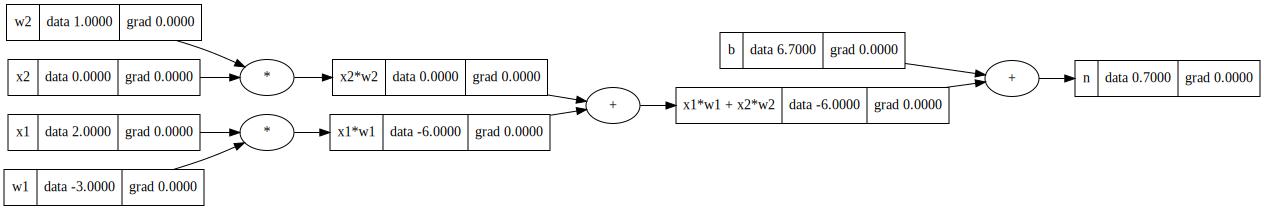

In [6]:
draw_dot(n)

Now, we have to get the output i.e. by having the dot product with the activation function.

So we have to implement the tanh function

Now, tanh is a hyperbolic expression. So it doesnt just contain +, -, it also has exponetials. So we have to create that function first in our Value object.

&nbsp;

![tanh equation](https://wikimedia.org/api/rest_v1/media/math/render/svg/b8dc4c309a551cafc2ce5c883c924ecd87664b0f)


So now, lets update our Value object

In [7]:
import math

In [8]:
class Value:

    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self.label = label


    def __repr__(self):   # This basically allows us to print nicer looking expressions for the final output
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')
        return out

In [9]:
#Inputs x1, x2 of the neuron
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

#Weights w1, w2 of the neuron - The synaptic values
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

#The bias of the neuron
b = Value(6.7, label='b')

x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'

#The summation
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'

In [10]:
#n is basically the cell body, but without the activation function
n = x1w1x2w2 + b; n.label = 'n'

#Now we pass n to the activation function

o = n.tanh(); o.label = 'o'

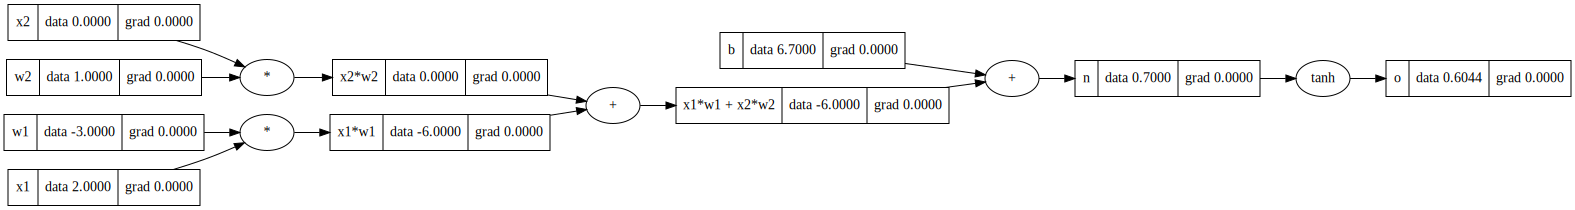

In [11]:
draw_dot(o)

We have recieved that output. So now, tanh is our little 'micrograd supported' node here, as an operation :)